In [1]:
import pandas as pd
import numpy as np
import os
import re
import time
import datetime
import gc
import string
import re
import seaborn as sns 
import matplotlib.pyplot as plt 
import math

from decimal import Decimal, getcontext

# --------------------------------------------

output_dir = r"E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\15. Paper Simulations\1. LG Thermostat\1. Two_Disk_Variable_Charge\1. T_0.25"

Sigma1 = pd.read_csv(r'E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\15. Paper Simulations\1. LG Thermostat\1. Two_Disk_Variable_Charge\1. T_0.25\1. C1_1.0_C2_1.0\91. Sigma_&_Charge_MD.csv',sep='\t')
Sigma2 = pd.read_csv(r'E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\15. Paper Simulations\1. LG Thermostat\1. Two_Disk_Variable_Charge\1. T_0.25\2. C1_1.0_C2_0.5\91. Sigma_&_Charge_MD.csv',sep='\t')
Sigma3 = pd.read_csv(r'E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\15. Paper Simulations\1. LG Thermostat\1. Two_Disk_Variable_Charge\1. T_0.25\3. C1_1.0_C2_0.0\91. Sigma_&_Charge_MD.csv',sep='\t')
Sigma4 = pd.read_csv(r'E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\15. Paper Simulations\1. LG Thermostat\1. Two_Disk_Variable_Charge\1. T_0.25\4. C1_1.0_C2_-0.5\91. Sigma_&_Charge_MD.csv',sep='\t')
Sigma5 = pd.read_csv(r'E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\15. Paper Simulations\1. LG Thermostat\1. Two_Disk_Variable_Charge\1. T_0.25\5. C1_1.0_C2_-1.0\91. Sigma_&_Charge_MD.csv',sep='\t')

# --------------------------------------------

Sigma1 = Sigma1.filter(['u/R','Sigma'])
Sigma2 = Sigma2.filter(['u/R','Sigma'])
Sigma3 = Sigma3.filter(['u/R','Sigma'])
Sigma4 = Sigma4.filter(['u/R','Sigma'])
Sigma5 = Sigma5.filter(['u/R','Sigma'])

In [2]:
# Renombrar la columna 'Sigma' en cada dataframe
Sigma1 = Sigma1.rename(columns={'Sigma': 'Epsilon_1.0'})
Sigma2 = Sigma2.rename(columns={'Sigma': 'Epsilon_0.50'})
Sigma3 = Sigma3.rename(columns={'Sigma': 'Epsilon_0.0'})
Sigma4 = Sigma4.rename(columns={'Sigma': 'Epsilon_-0.50'})
Sigma5 = Sigma5.rename(columns={'Sigma': 'Epsilon_-1.0'})

# Unir los dataframes utilizando un left join
Sigma_Total = Sigma1.merge(Sigma2, on='u/R', how='left').merge(Sigma3, on='u/R', how='left').merge(Sigma4, on='u/R', how='left').merge(Sigma5, on='u/R', how='left')


Epsilon_1.0
Epsilon_0.50
Epsilon_0.0
Epsilon_-0.50
Epsilon_-1.0


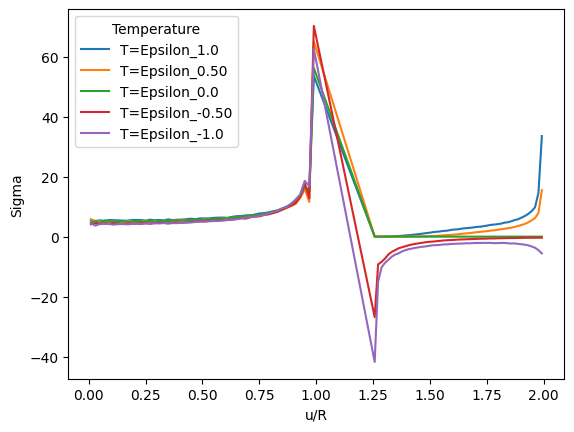

In [3]:
import scipy.special as sps

r_2 = 8.0
r_G = 5.0

Muestras = 50               # Número de muestras

e0 = 1

# Lista de valores de Z que deseas graficar
valores_Z = ['Epsilon_1.0','Epsilon_0.50','Epsilon_0.0','Epsilon_-0.50','Epsilon_-1.0'] 

# valores_Z = list(Sigma_Total.columns())

for Z in valores_Z:
    print(Z)
    columna_potencial = f'{Z}'
    sns.lineplot(data=Sigma_Total, x='u/R', y=columna_potencial, label=f'T={Z}')

# Personaliza el gráfico (títulos y etiquetas)
# plt.title('Gráfico de Potencial en función de U para diferentes valores de Z')
plt.xlabel('u/R')
plt.ylabel('Sigma')

# plt.ylim(0, 1.5)

# Agrega una leyenda
plt.legend(title='Temperature',loc='upper left')

plt.savefig(os.path.join(output_dir, "Sigma_Comp.png"))

Sigma_Total.to_csv(os.path.join(output_dir, f"Sigma_Join.csv"), sep='\t', index=False)

In [4]:
# del columna_potencial,Sigma1,Sigma2,Sigma3,Sigma4,Sigma5,Sigma6,Sigma7,Sigma8,Sigma9,Sigma_Total,valores_Z,Z